# Machine Learning Practical No.5
Ensemble Learning

  Implement Random Forest Classifier model to predict the safety of the car.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"car_evaluation.csv")#Loading the dataset
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
count = df['class'].value_counts()
count

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

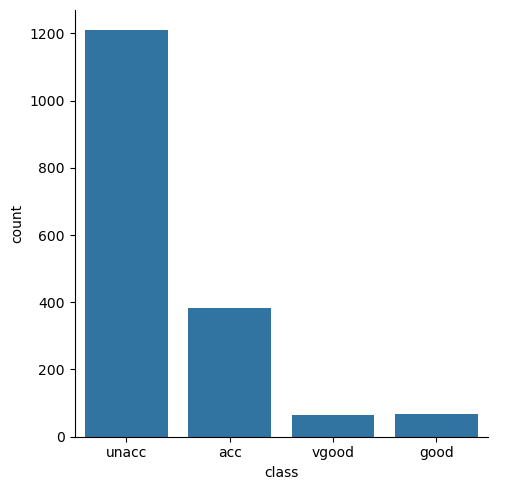

In [7]:
sns.catplot(data=df, kind='count', x="class")
plt.show()

In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [9]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [10]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Encode all columns except the target 'class'
for col in df.columns[:-1]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("All feature columns encoded successfully!")

All feature columns encoded successfully!


In [12]:
X = df.drop(columns=["class"])
y = df["class"]

In [13]:

from sklearn.model_selection import train_test_split
# Step 3: Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,buying,maint,doors,persons,lug_boot,safety
107,3,0,0,0,2,1
900,2,3,1,1,2,2
1708,1,1,3,0,0,0
705,0,2,2,0,1,2
678,0,2,1,0,1,2
...,...,...,...,...,...,...
1130,2,2,1,2,0,1
1294,2,1,3,2,0,0
860,0,1,3,2,0,1
1459,1,0,2,0,2,0


In [15]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,      # a bit higher than 100 for stability
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9624



In [18]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         acc       0.94      0.94      0.94        77
        good       0.91      0.67      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



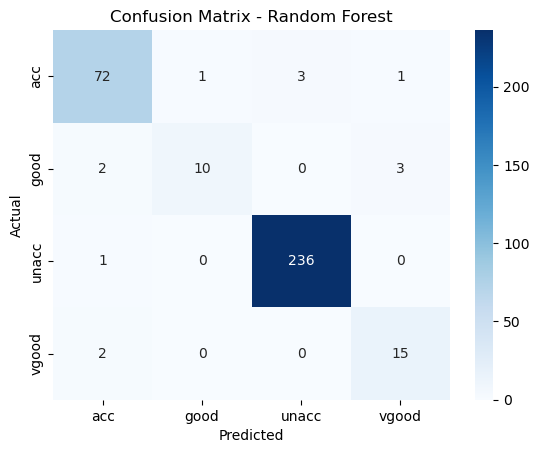

In [21]:
cm = confusion_matrix(y_test, y_pred)

# Get class labels directly from y_test
class_labels = sorted(y_test.unique())

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

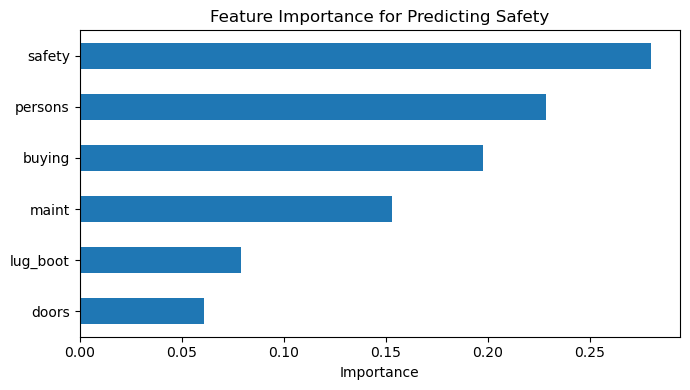

safety      0.280329
persons     0.228555
buying      0.197642
maint       0.153121
lug_boot    0.079368
doors       0.060984
dtype: float64

In [26]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()

plt.figure(figsize=(7,4))
feat_imp.plot(kind="barh")
plt.title("Feature Importance for Predicting Safety")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

feat_imp.sort_values(ascending=False)


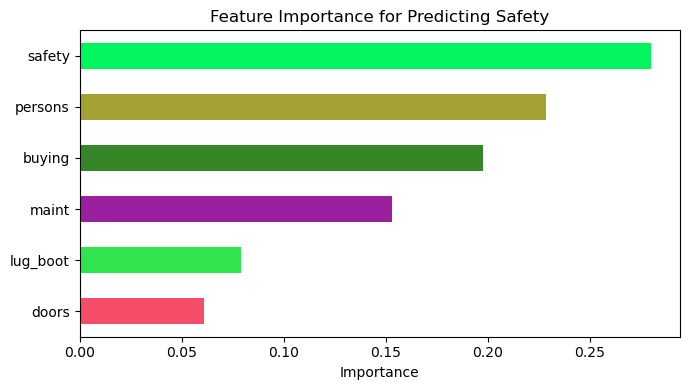

In [27]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()

# Generate random colors for each bar
colors = np.random.rand(len(feat_imp), 3)

plt.figure(figsize=(7,4))
feat_imp.plot(kind="barh", color=colors)
plt.title("Feature Importance for Predicting Safety")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()